In [1]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import h5py


def delta_sco2(x):
    return x*(-0.00034774683749767404)+0.00075751732302189
def delta_wco2(x):
    return x*(-0.00036041255295181477)+0.0006099674364339724
n_sco2 = 755
n_wco2 = 525
x_sco2 = []
x_wco2 = []
x_sco2.append(2.0478)
for i in range(n_sco2-1):
    x_sco2.append(x_sco2[i]+delta_sco2(x_sco2[i]))

x_wco2.append(1.599)
for i in range(n_wco2-1):
    x_wco2.append(x_wco2[i]+delta_wco2(x_wco2[i]))


In [2]:
spec_raw_file_1 = '../simulated_profiles/result_16.pkl'
spec_raw_file_2 = '../simulated_profiles/result_17.pkl'
spec_raw_file_3 = '../simulated_profiles/result_18.pkl'
spec_raw_file_4 = '../simulated_profiles/result_19.pkl'
spec_raw_file_5 = '../simulated_profiles/result_20.pkl'
spec_raw_file_6 = '../simulated_profiles/result_21.pkl'

with open(spec_raw_file_1,'rb') as spec_file:
    spec_raw_1 = pickle.load(spec_file)
with open(spec_raw_file_2,'rb') as spec_file:
    spec_raw_2 = pickle.load(spec_file)
with open(spec_raw_file_3,'rb') as spec_file:
    spec_raw_3 = pickle.load(spec_file)
with open(spec_raw_file_4,'rb') as spec_file:
    spec_raw_4 = pickle.load(spec_file)
with open(spec_raw_file_5,'rb') as spec_file:
    spec_raw_5 = pickle.load(spec_file)
with open(spec_raw_file_6,'rb') as spec_file:
    spec_raw_6 = pickle.load(spec_file)


In [3]:
def check_none(spec_raw):
    k = 0
    index = []
    for i in range(len(spec_raw)):
        if (spec_raw[i][0][1] == []) or (spec_raw[i][1][1] == []):
            index.append(i)
            k = k+1
    return k,index

def spec_raw_intp(spec_raw,wco2,sco2):
    spec_inter = []
    for i in range(len(spec_raw)):
        a = np.append(np.interp(wco2,spec_raw[i][0][0],spec_raw[i][0][1]),np.interp(sco2,spec_raw[i][1][0],spec_raw[i][1][1]),axis=0)
        spec_inter.append(a)
    return np.array(spec_inter)

In [ ]:
num_1, index_1 = check_none(spec_raw_1)
num_2, index_2 = check_none(spec_raw_2)
num_3, index_3 = check_none(spec_raw_3)
num_4, index_4 = check_none(spec_raw_4)
num_5, index_5 = check_none(spec_raw_5)
num_6, index_6 = check_none(spec_raw_6)

In [5]:
spec_inter_1 = spec_raw_intp(spec_raw_1,x_wco2,x_sco2)
spec_inter_2 = spec_raw_intp(spec_raw_2,x_wco2,x_sco2)
spec_inter_3 = spec_raw_intp(spec_raw_3,x_wco2,x_sco2)
spec_inter_4 = spec_raw_intp(spec_raw_4,x_wco2,x_sco2)
spec_inter_5 = spec_raw_intp(spec_raw_5,x_wco2,x_sco2)
spec_inter_6 = spec_raw_intp(spec_raw_6,x_wco2,x_sco2)


In [ ]:
spec_inter = np.append(spec_inter_1,spec_inter_2,axis=0)
spec_inter = np.append(spec_inter,spec_inter_3,axis=0)
spec_inter = np.append(spec_inter,spec_inter_4,axis=0)
spec_inter = np.append(spec_inter,spec_inter_5,axis=0)
spec_inter = np.append(spec_inter,spec_inter_6,axis=0)

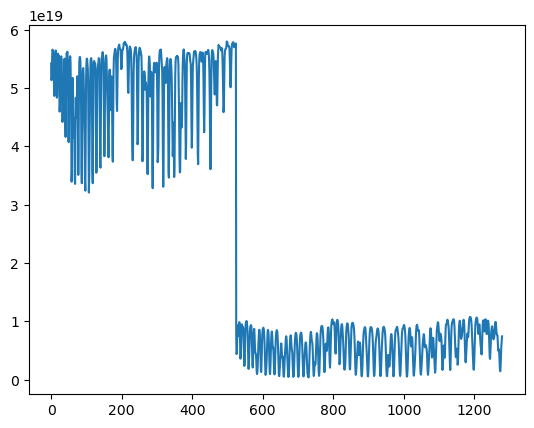

In [8]:
plt.plot(spec_inter[0,:])

In [9]:
spec = pd.DataFrame(spec_inter)

In [10]:
spec.to_hdf('spectral.h5',key='spec')